<a href="https://colab.research.google.com/github/Atechsol/Atechsol.gitub.io/blob/main/ml_workashop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
df=pd.read_csv("LOAN.csv")
df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
df=df.drop(['Loan_ID'],axis=1)

In [116]:
ogdata=df.copy()

In [117]:
print("Data Description")
df.describe()
df.head(5)
df.tail(5)

Data Description


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [118]:
df.columns
df.shape

(614, 12)

In [119]:
df.info()
df.dtypes#gives datatypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [120]:
#null values
#sum is used to get the combined values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
datacopy=df.copy()
print(datacopy.isnull().sum())
print(datacopy.shape)
datacopy=datacopy.dropna()
#to drop missing values
print(datacopy.isnull().sum())
print(datacopy.shape)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 12)
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(480, 12)


In [122]:
datacopy=df.copy()
print(datacopy.isnull().sum())
print(datacopy.shape)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 12)


In [123]:
datacopy=df.copy()
from sklearn.impute import SimpleImputer
categorical_imputer=SimpleImputer(strategy='most_frequent')
numerical_imputer=SimpleImputer(strategy='mean')

for column in df.columns:
  if(datacopy[column].dtype=='int64' or datacopy[column].dtype=='float64'):

   datacopy[column]=numerical_imputer.fit_transform(datacopy[column].values.reshape(-1,1))
  else:
    datacopy[column]=categorical_imputer.fit_transform(datacopy[column].values.reshape(-1,1))
print(datacopy.isnull().sum())
print(datacopy.shape)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(614, 12)


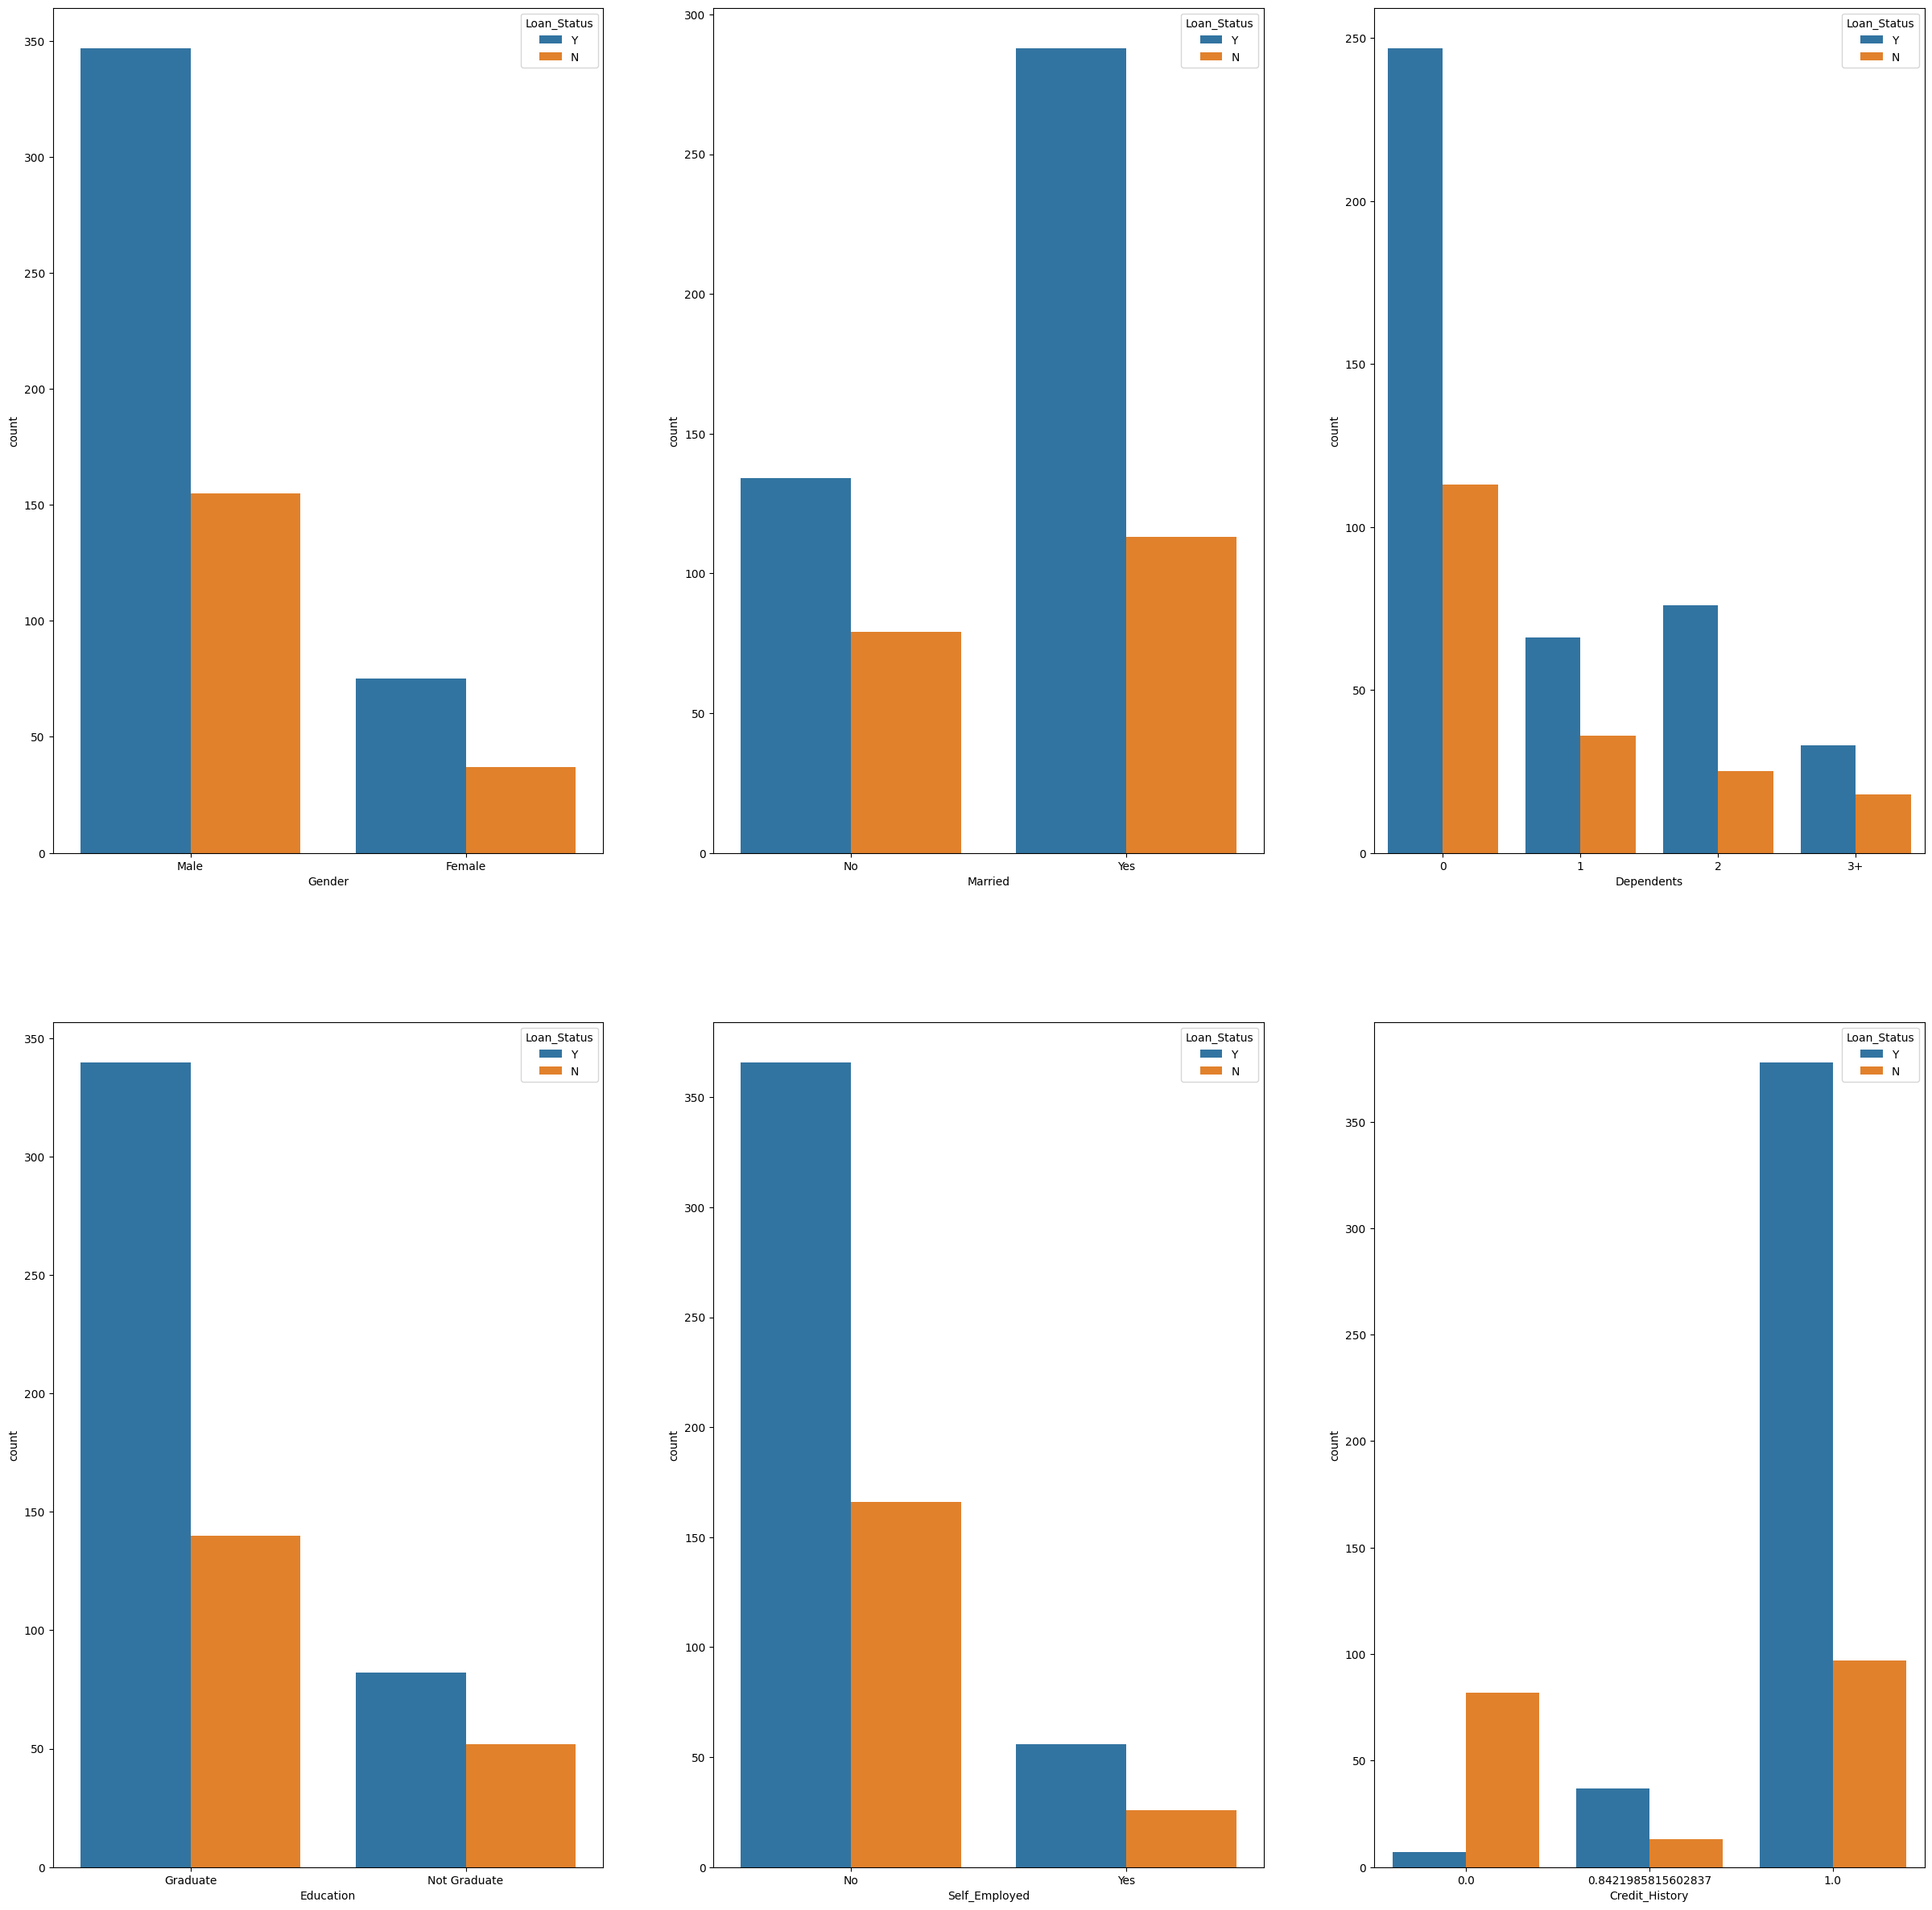

In [124]:

df=datacopy.copy()
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,3,figsize=(30,30))
sns.countplot(x='Gender',hue='Loan_Status',data=df,ax=ax[0,0])
sns.countplot(x='Married',hue='Loan_Status',data=df,ax=ax[0,1])
sns.countplot(x='Dependents',hue='Loan_Status',data=df,ax=ax[0,2])
sns.countplot(x='Education',hue='Loan_Status',data=df,ax=ax[1,0])
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,ax=ax[1,1])
sns.countplot(x='Credit_History',hue='Loan_Status',data=df,ax=ax[1,2])
plt.show()





In [125]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

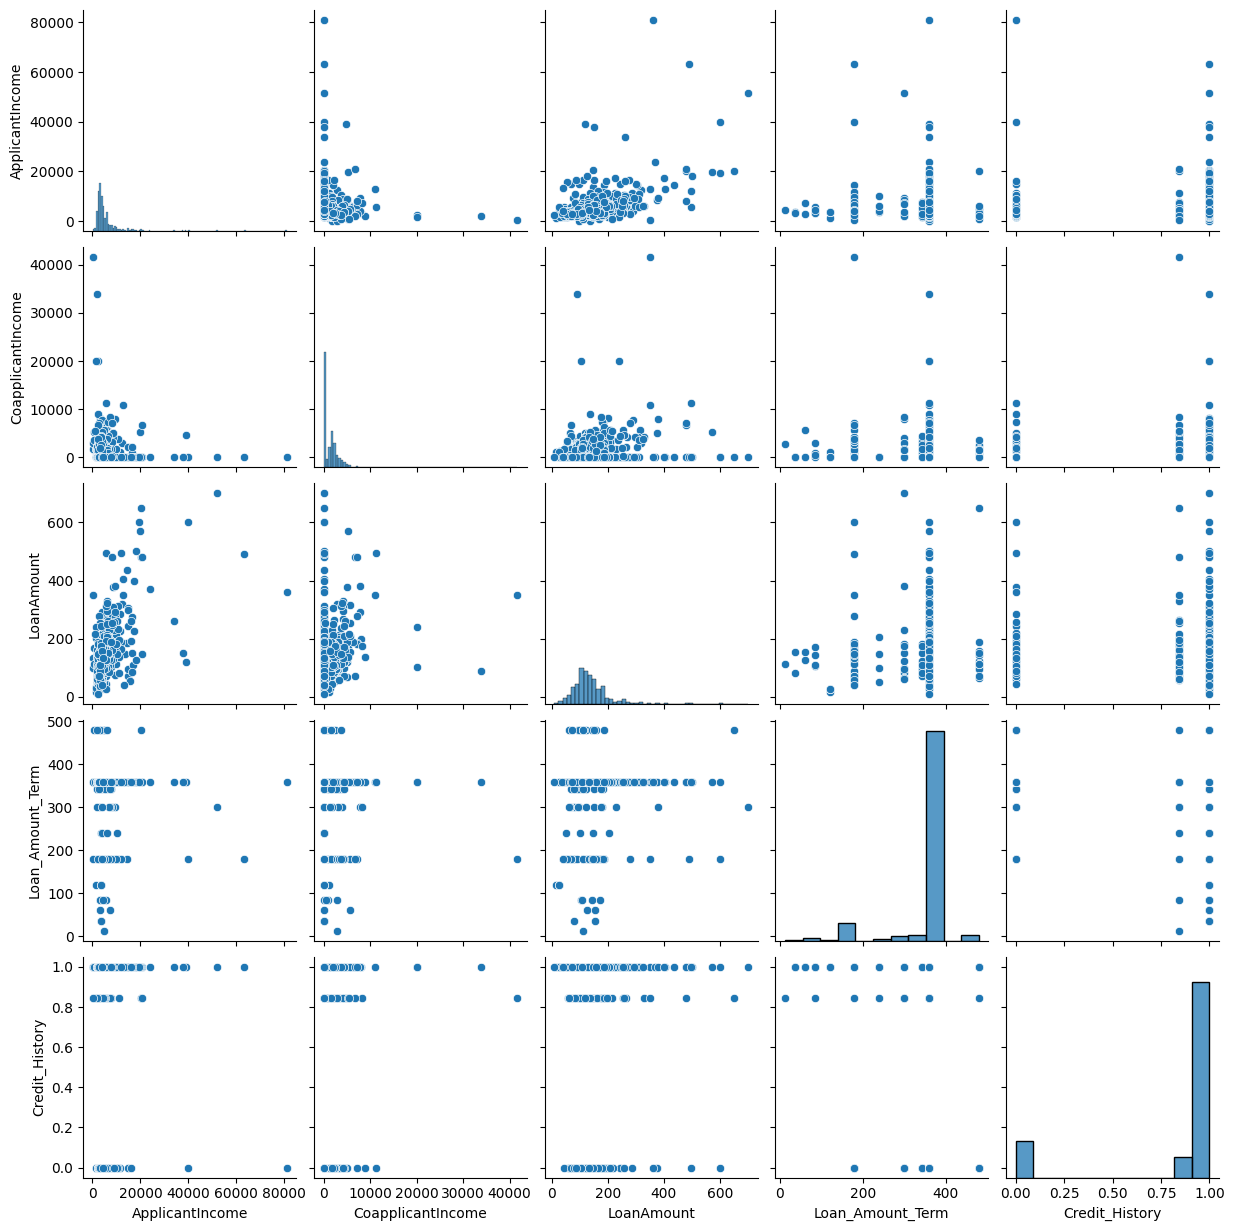

In [126]:
#PAIRPLOT MUTUAL DAA DISTRIBUTION
sns.pairplot(data)
plt.show()


DATA ENCODING

In [127]:
#label encoding using sklearn
from sklearn import preprocessing
#labelencoder = le
le=preprocessing.LabelEncoder()
cat_columns=datacopy.select_dtypes(exclude='number').columns
for column in cat_columns:
  le.fit(datacopy[column])
  datacopy[column]= le.fit_transform(datacopy[column])
  datacopy[column]=datacopy[column]+1
datacopy
df=datacopy.copy()


Outlier detection


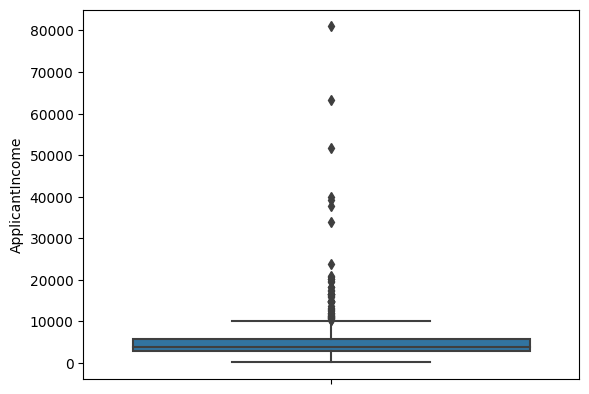

In [128]:
datacopy=df.copy()
import seaborn as sns
feature="ApplicantIncome"
ax=sns.boxplot(y=feature,data=datacopy)
plt.show()


In [129]:
q1=datacopy[feature].quantile(0.25)
q3=datacopy[feature].quantile(.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
datacopy.drop(datacopy[(datacopy[feature]>upper)| (datacopy[feature]<lower)].index,inplace=True)

In [130]:
#Data Imbalance Handling
x=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']
datacopy=df.copy()

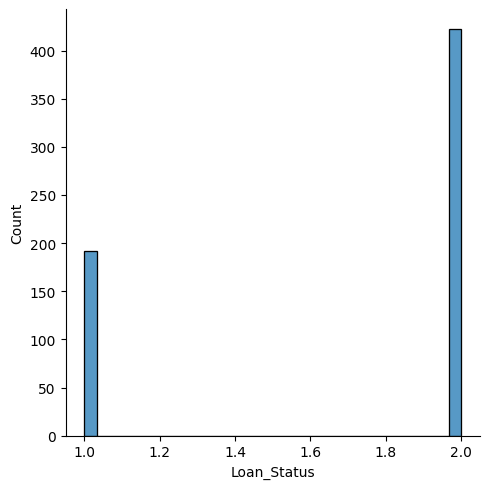

In [131]:
sns.displot(y,bins=30)
plt.show()

In [132]:
!pip install imblearn

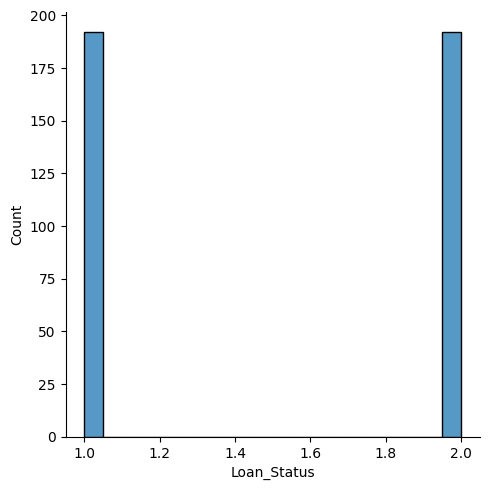

In [133]:
from imblearn.under_sampling import RandomUnderSampler
sam=RandomUnderSampler(random_state=0)
x_resampled_u,y_resampled_u=sam.fit_resample(x,y)
sns.displot(y_resampled_u,bins=20)
plt.show()


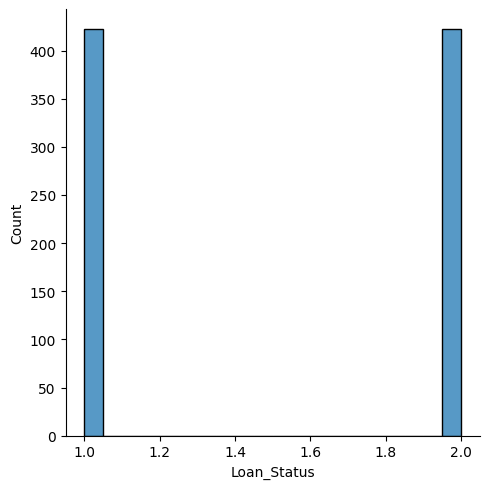

In [134]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
sam=RandomOverSampler(random_state=0)
x_resampled,y_resampled=sam.fit_resample(x,y)
sns.displot(y_resampled,bins=20)
plt.show()


In [135]:
import pandas as pd
datacopy=pd.concat([x_resampled,y_resampled],axis=1)
print(datacopy.shape)
datacopy

(844, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,1,1,1,5849.0,0.0,146.412162,360.0,1.000000,3,2
1,2,2,2,1,1,4583.0,1508.0,128.000000,360.0,1.000000,1,1
2,2,2,1,1,2,3000.0,0.0,66.000000,360.0,1.000000,3,2
3,2,2,1,2,1,2583.0,2358.0,120.000000,360.0,1.000000,3,2
4,2,1,1,1,1,6000.0,0.0,141.000000,360.0,1.000000,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
839,2,2,4,1,1,3167.0,4000.0,180.000000,300.0,0.000000,2,1
840,2,2,2,1,1,4166.0,3369.0,201.000000,360.0,0.842199,3,1
841,2,2,4,2,1,2647.0,1587.0,173.000000,360.0,1.000000,1,1
842,2,2,3,1,1,3340.0,1710.0,150.000000,360.0,0.000000,1,1


feature selection
find best features using chi square test

In [136]:
datacopy=df.copy()
x=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']

from sklearn.feature_selection import SelectKBest,chi2
features=SelectKBest(score_func=chi2,k=5)
fit=features.fit(x,y)
feature_names = list(x.columns)
feature_scores = pd.DataFrame({'Feature':feature_names,'score':fit.scores_})
feature_scores = feature_scores.sort_values(by = 'score', ascending = False)
feature_scores



,Feature,score
6,CoapplicantIncome,11342.041603
5,ApplicantIncome,93.904964
7,LoanAmount,39.211545
9,Credit_History,25.998867
8,Loan_Amount_Term,3.267315
1,Married,0.704190
3,Education,0.634261
10,Property_Area,0.192392
2,Dependents,0.036676
0,Gender,0.016299


USING CORRELATION

<function matplotlib.pyplot.show(close=None, block=None)>

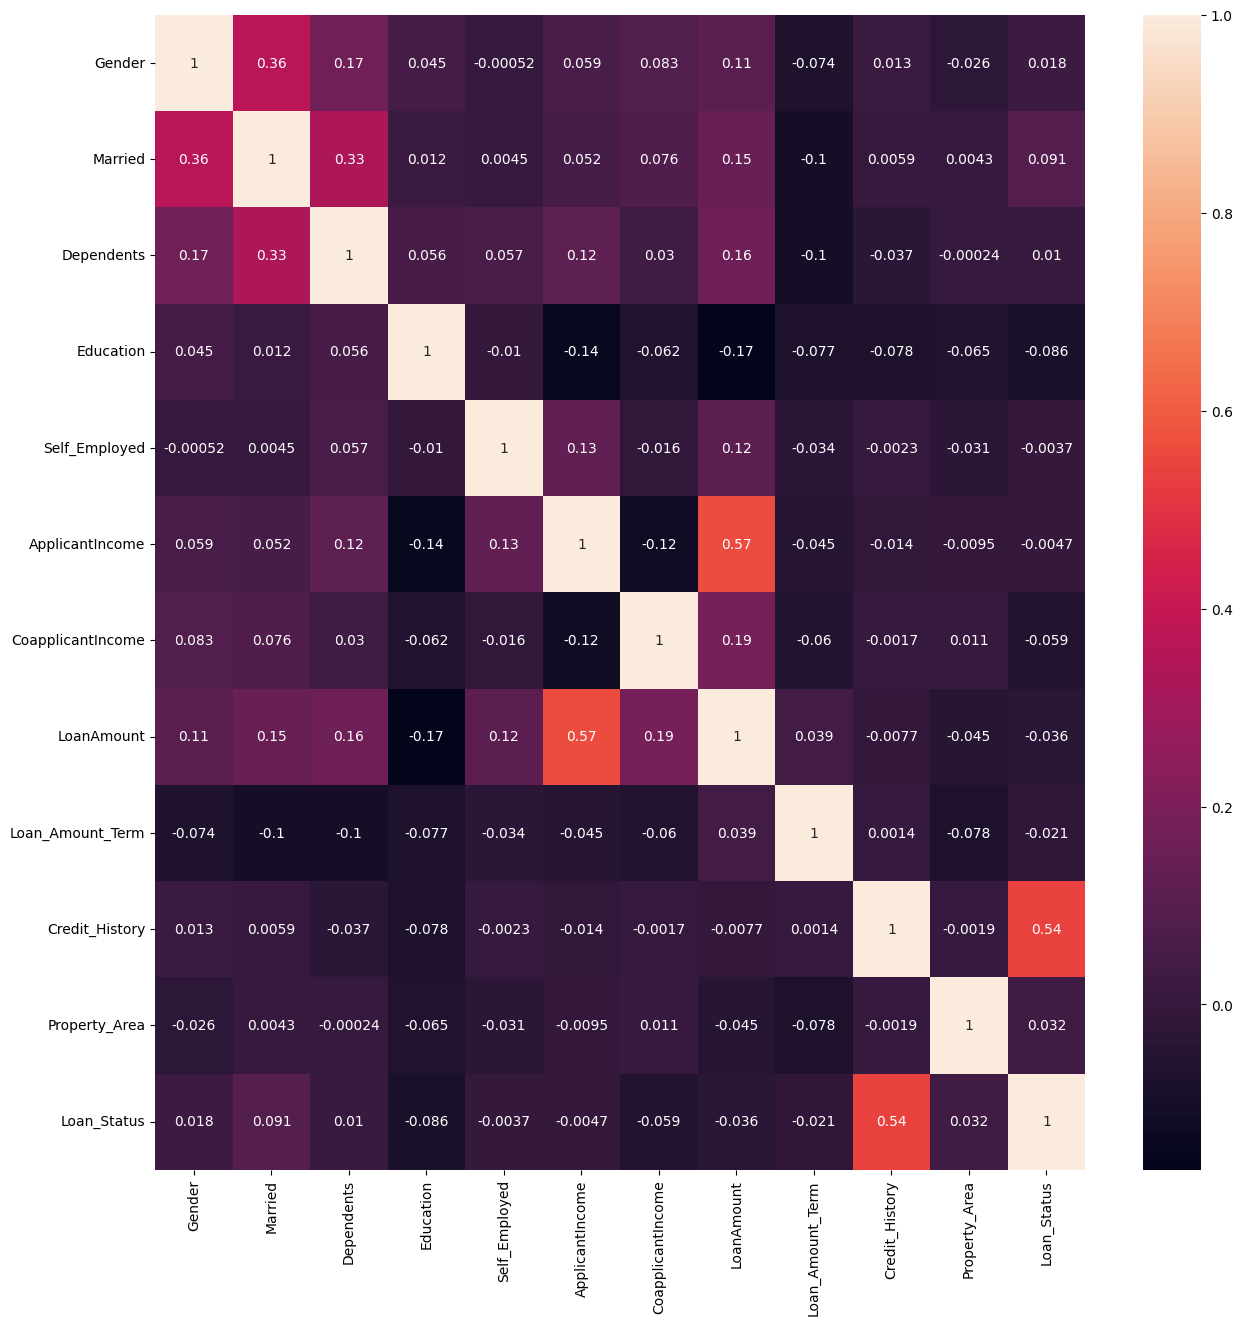

In [138]:
plt.figure(figsize=(15,15))
corr=datacopy.corr()
sns.heatmap(corr,annot=True)
plt.show
#white=highly correlated
#black= no correlation


Feature transformation


Normalization

In [146]:
from sklearn.preprocessing import MinMaxScaler
features=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']
from pandas import DataFrame
featurescopy=features.copy()
obj=MinMaxScaler().fit(features)
selectedfeatures=obj.transform(features)
scaleddf=DataFrame(selectedfeatures,columns=featurescopy.columns)
scaleddf


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [147]:
from sklearn.preprocessing import StandardScaler
features=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']
from pandas import DataFrame
featurescopy=features.copy()
obj=StandardScaler().fit(features)
selectedfeatures=obj.transform(features)
scaleddf=DataFrame(selectedfeatures,columns=featurescopy.columns)
scaleddf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.451640,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.451640,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.451640,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.451640,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.451640,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.279851,0.451640,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.518655,0.451640,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.279851,0.451640,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.279851,0.451640,1.223298


Train Test Split

In [148]:
from sklearn.model_selection import train_test_split
x=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=400)
print(x_train.shape)
print(x_test.shape)

(491, 11)
(123, 11)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


LogReg
              precision    recall  f1-score   support

           1       0.94      0.46      0.62        35
           2       0.82      0.99      0.90        88

    accuracy                           0.84       123
   macro avg       0.88      0.72      0.76       123
weighted avg       0.86      0.84      0.82       123



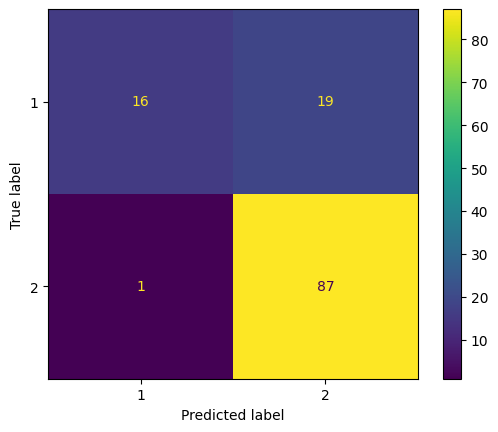


RF
              precision    recall  f1-score   support

           1       0.68      0.43      0.53        35
           2       0.80      0.92      0.86        88

    accuracy                           0.78       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.78      0.76       123



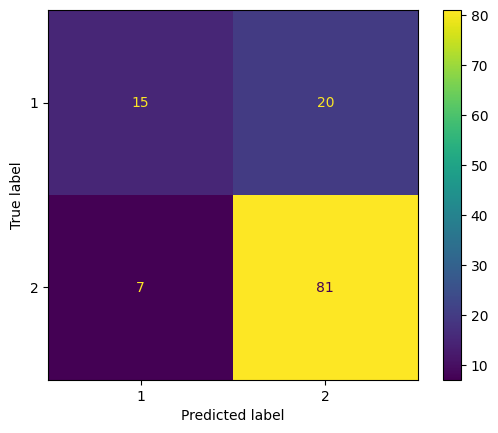


KNN
              precision    recall  f1-score   support

           1       0.25      0.09      0.13        35
           2       0.71      0.90      0.79        88

    accuracy                           0.67       123
   macro avg       0.48      0.49      0.46       123
weighted avg       0.58      0.67      0.60       123



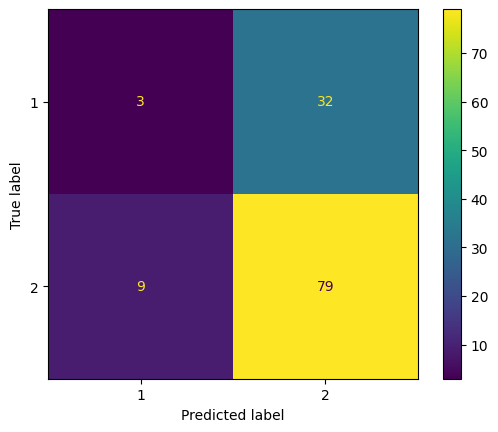

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin


SVM
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.72      1.00      0.83        88

    accuracy                           0.72       123
   macro avg       0.36      0.50      0.42       123
weighted avg       0.51      0.72      0.60       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


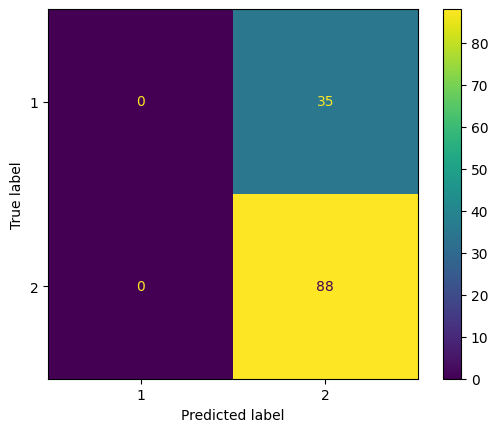


MLP
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.71      0.99      0.83        88

    accuracy                           0.71       123
   macro avg       0.36      0.49      0.41       123
weighted avg       0.51      0.71      0.59       123



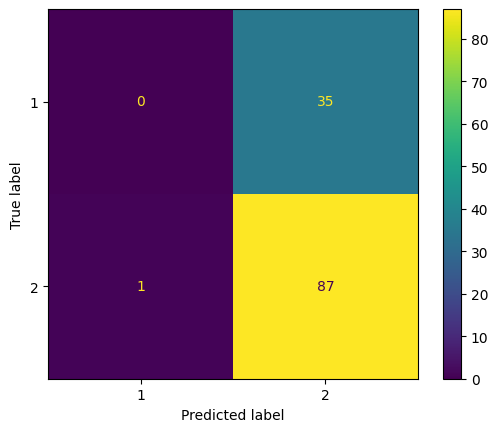

    fit_time  score_time  test_accuracy  test_precision  test_recall  \
0   0.042058    0.020495       0.767677        0.823529     0.411765   
1   0.031394    0.014084       0.836735        0.937500     0.500000   
2   0.028745    0.023708       0.826531        0.928571     0.448276   
3   0.065829    0.027014       0.765306        0.888889     0.266667   
4   0.099790    0.037940       0.806122        0.894737     0.500000   
5   0.322278    0.095750       0.696970        0.571429     0.470588   
6   0.342760    0.040935       0.806122        0.789474     0.500000   
7   0.336565    0.022166       0.765306        0.636364     0.482759   
8   0.180145    0.024124       0.755102        0.714286     0.333333   
9   0.184684    0.025652       0.775510        0.750000     0.529412   
10  0.003860    0.019564       0.606061        0.368421     0.205882   
11  0.002426    0.014581       0.581633        0.176471     0.100000   
12  0.002352    0.014481       0.591837        0.176471     0.10

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

from sklearn import model_selection
models = [
        ('LogReg', LogisticRegression()),
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC()),
        ('MLP', MLPClassifier())
    ]




scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
dfs     = []
target_names = ['1','2']
for name, model in models:
  kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
  cv_results = model_selection.cross_validate(model, x_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
  clf = model.fit(x_train, y_train.values.ravel())
  y_pred = clf.predict(x_test)
  print("\n"+name)
  print(classification_report(y_test, y_pred, target_names=target_names))
  confusionMatrix = confusion_matrix(y_test, y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['1','2'])
  cm_display.plot()
  plt.show()
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)
finalData = pd.concat(dfs, ignore_index=True)
print(finalData)

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid = {
    'n_estimators': [25, 50,60,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 6,9,None],
    'max_leaf_nodes': [6,9,11,None]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv)
grid_search.fit(x_train, y_train.values.ravel())
grid_search.best_estimator_


RandomForestClassifier(max_depth=3, max_leaf_nodes=6)

Hyperparamerter tuning

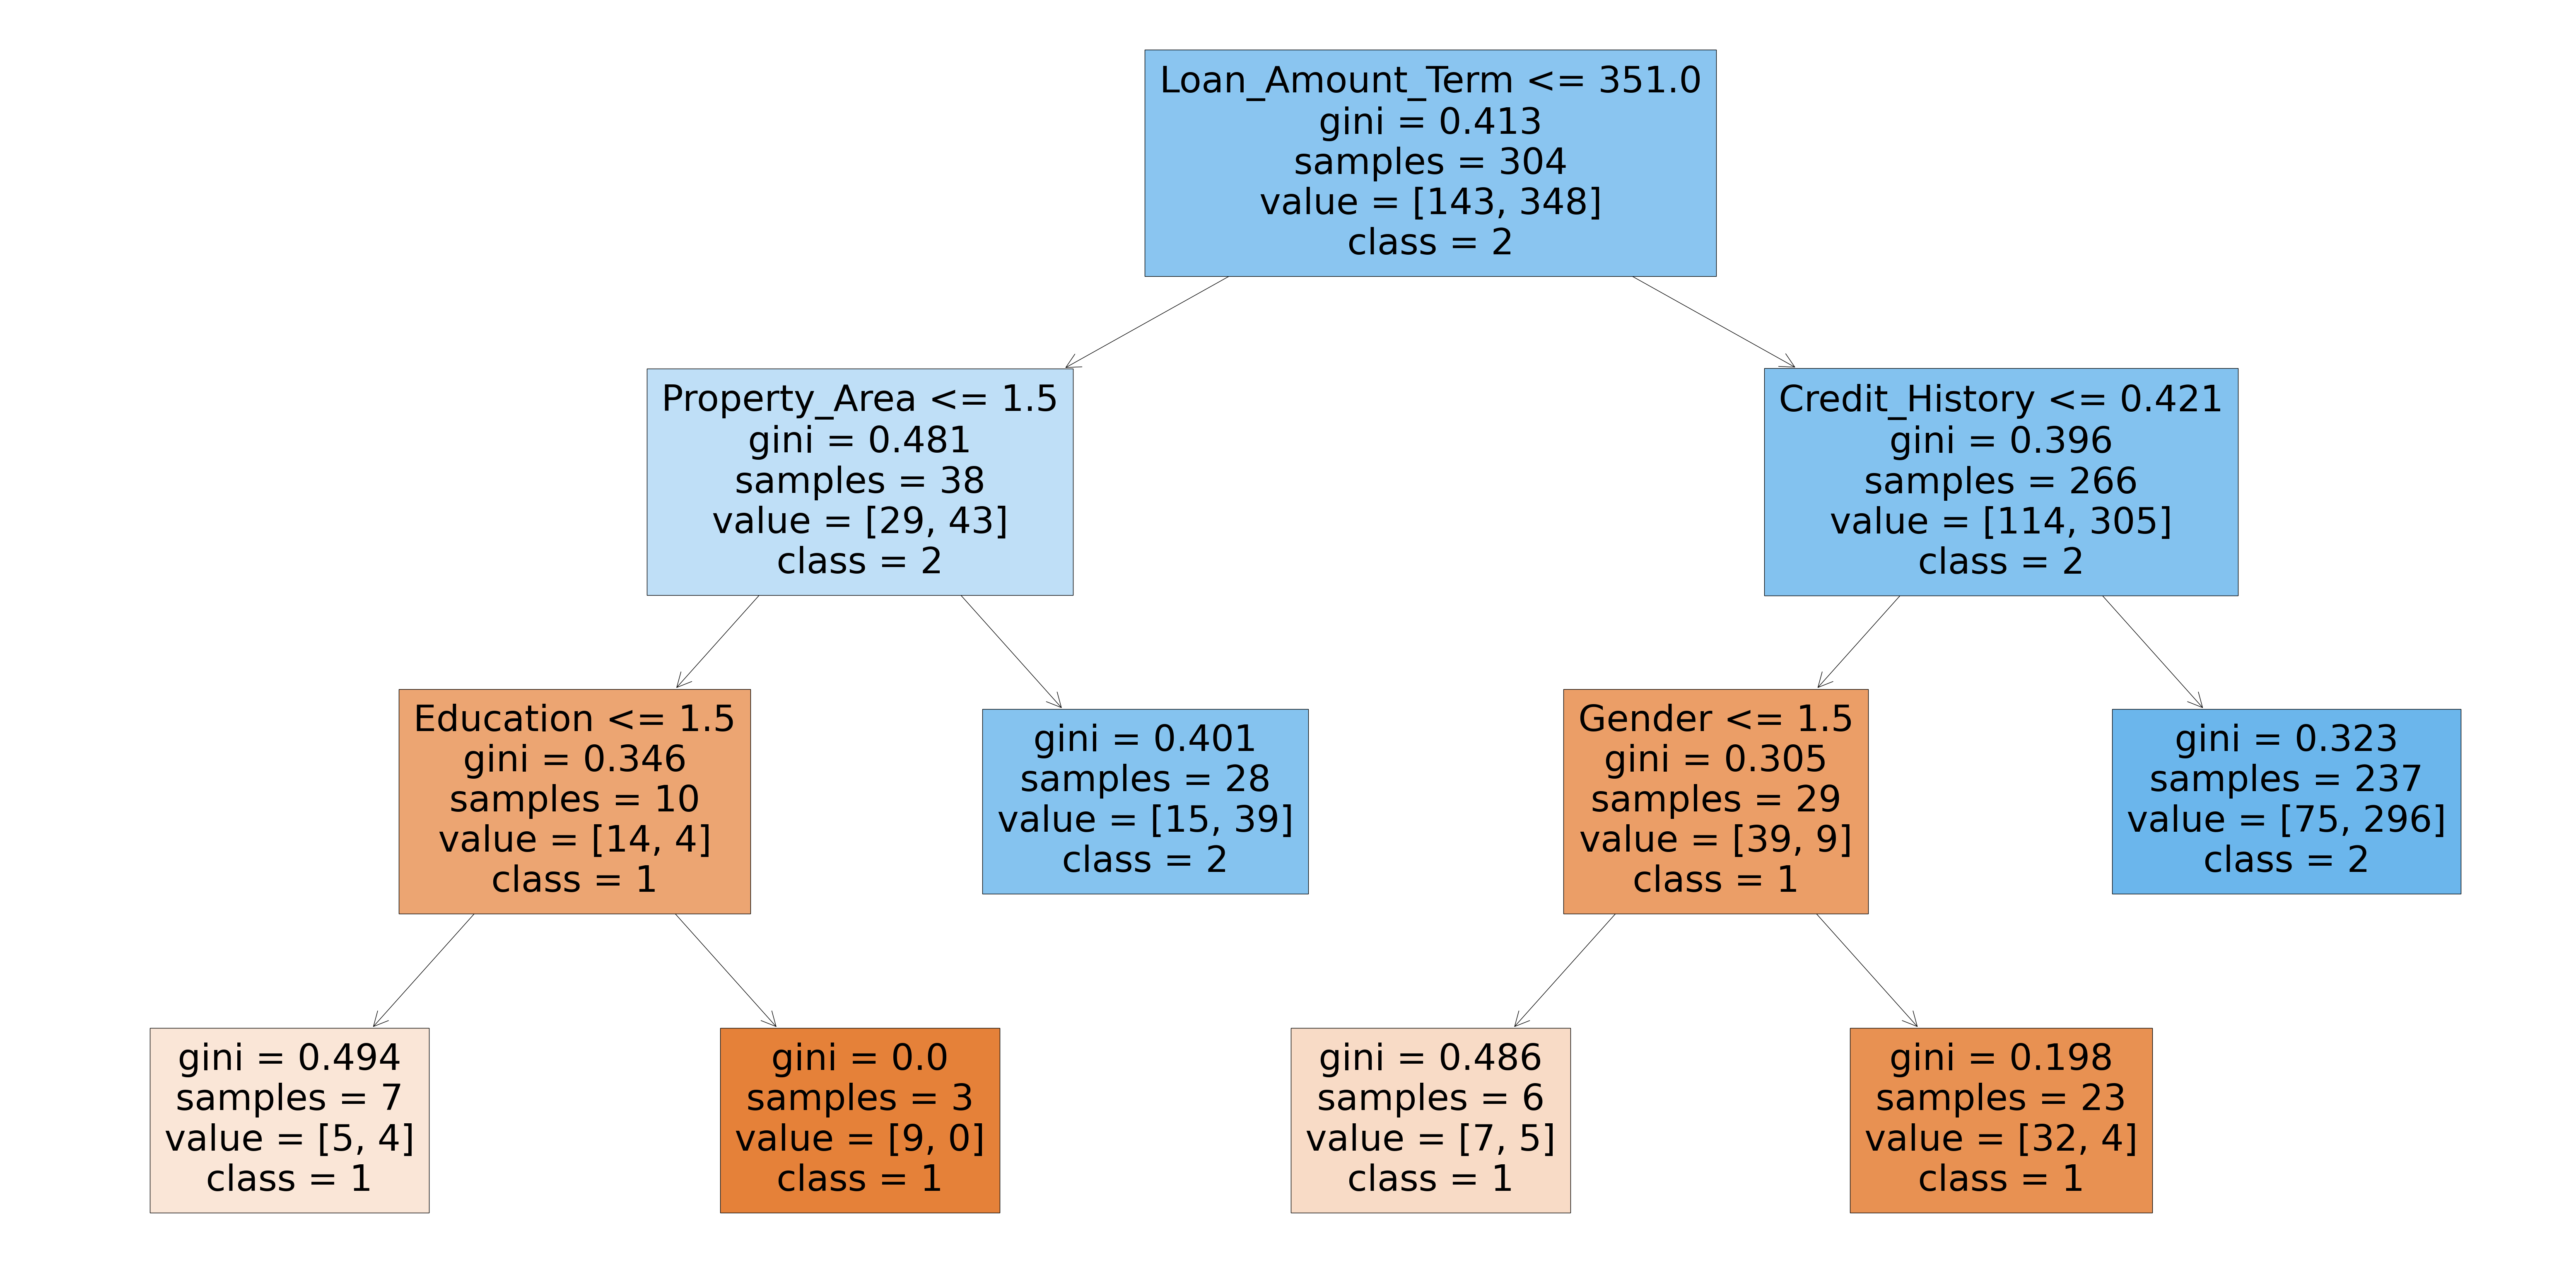

In [159]:
from sklearn.tree import plot_tree
rf_best = grid_search.best_estimator_
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[3], feature_names=x_train.columns, class_names=['1', '2'],filled=True);
plt.show()


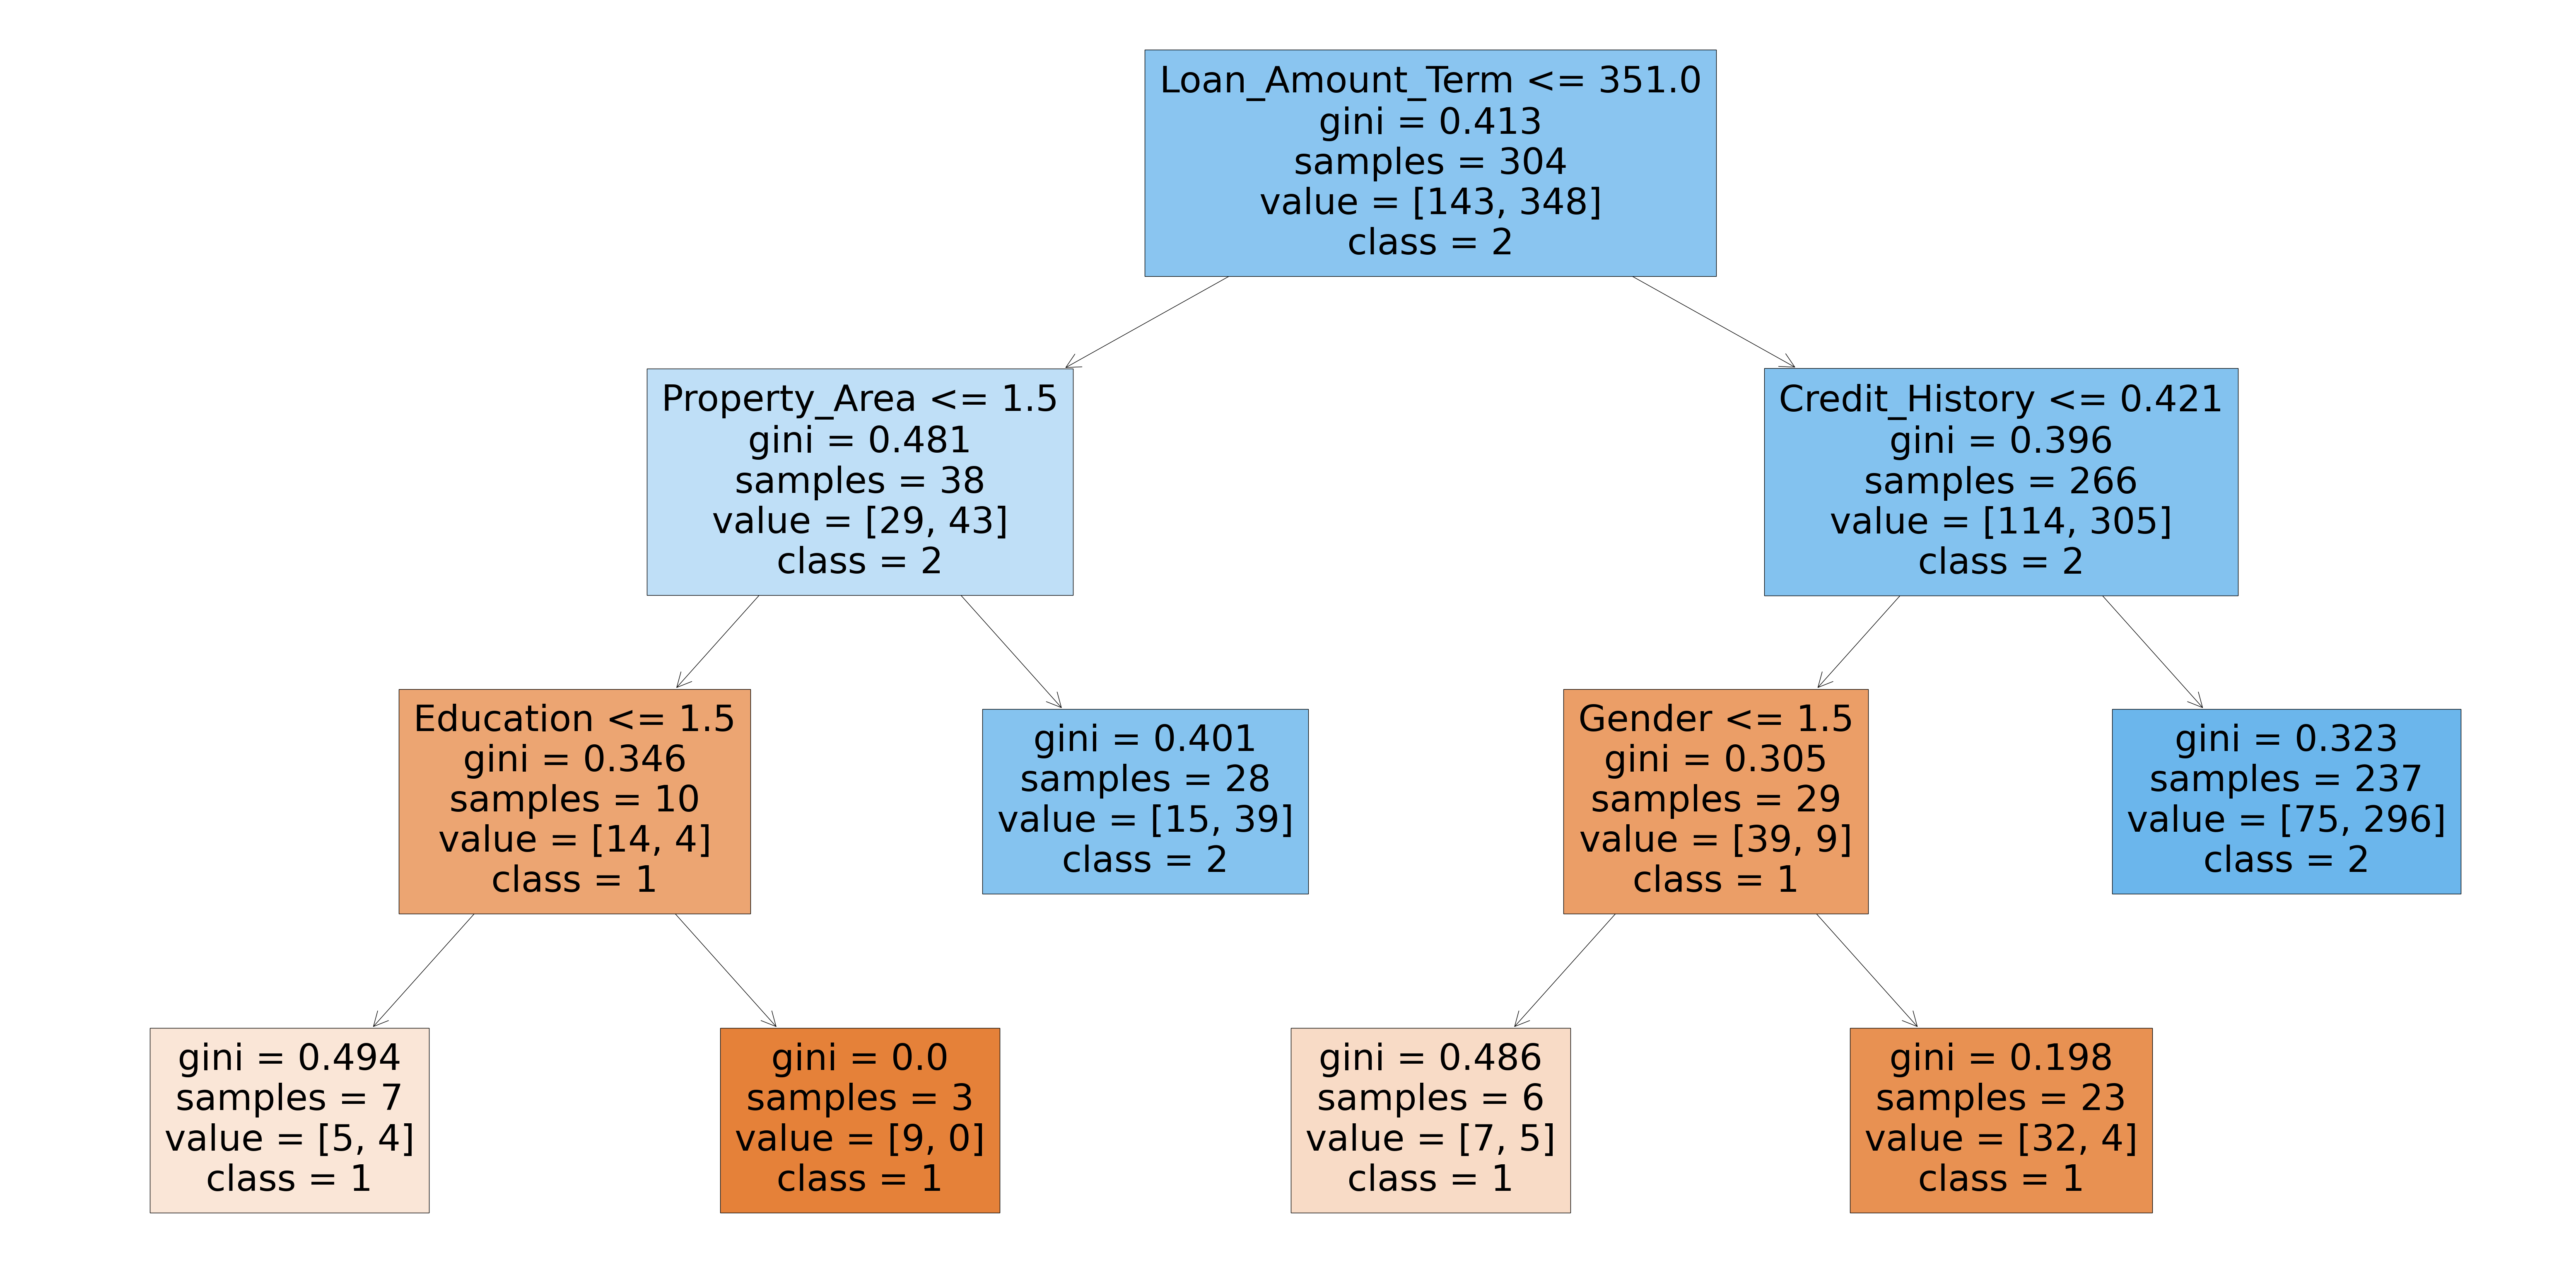

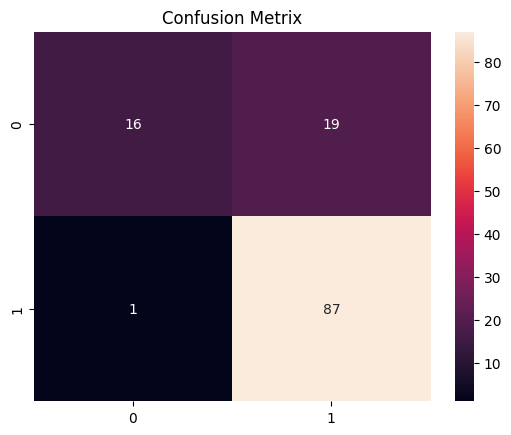

              precision    recall  f1-score   support

           1       0.94      0.46      0.62        35
           2       0.82      0.99      0.90        88

    accuracy                           0.84       123
   macro avg       0.88      0.72      0.76       123
weighted avg       0.86      0.84      0.82       123

0.8373983739837398


In [162]:
from sklearn.tree import plot_tree
rf_best = grid_search.best_estimator_
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[3], feature_names=x_train.columns, class_names=['1', '2'],filled=True);
plt.show()
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

classifier_rf = RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=25, max_features='log2')
classifier_rf.fit(x_train, y_train)
y_pred = classifier_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion Metrix')
plt.show()
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
pickle.dump(classifier_rf, open('model.pkl', 'wb'))
